This is essentially my attempt to understand and explore what was explained in a numebrphile video with code.
Video link:
https://youtu.be/K79aOe-F0Mk?si=R-3Lh5eenzUDfEqP

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [4]:
### Simulating Pokémon Encounters
def simulate_encounters(n_pokemon, n_simulations=10000):
    encounters_needed = []
    for _ in range(n_simulations):
        seen = set()
        encounters = 0
        while len(seen) < n_pokemon:
            encounters += 1
            seen.add(np.random.randint(1, n_pokemon + 1))
        encounters_needed.append(encounters)
    return encounters_needed

In [10]:
# Parameters
n_pokemon = 150
n_simulations = 10000

# Simulate
encounters_needed = simulate_encounters(n_pokemon, n_simulations)

# Convert to DataFrame for easy visualization
df_encounters = pd.DataFrame(encounters_needed, columns=['Encounters'])

# Summary statistics
summary_stats = df_encounters.describe()
print(summary_stats)

         Encounters
count  10000.000000
mean     838.619400
std      190.124816
min      396.000000
25%      705.000000
50%      807.000000
75%      936.000000
max     2058.000000


### Geometric Distribution
The geometric distribution models the number of trials needed for a first success in a series of Bernoulli trials.
The probability of success in each trial is `p`, and the probability of failure is `1-p`.

For example, if the probability of encountering a new Pokémon is `p`, the number of encounters needed to find a new Pokémon
follows a geometric distribution. The expected number of encounters for a new Pokémon is `1/p`.

In the Pokémon context, the probability `p` changes as you catch new Pokémon because the pool of unseen Pokémon decreases.

### Expected Value
The expected value is the average number of trials needed for an event to occur, considering the probabilities of different outcomes.
For a geometric distribution with probability `p`, the expected value (or mean) is `1/p`.

In our scenario:
- The first encounter is guaranteed to be a new Pokémon (expected value = 1).
- The second encounter has a probability of `n-1/n` of being a new Pokémon, so the expected value is `n/(n-1)`.
- This pattern continues until the last Pokémon is caught.

The total expected number of encounters to catch all `n` Pokémon is the sum of these expected values.

In [11]:
# Calculate expected encounters for a given number of Pokémon
def expected_encounters(n_pokemon):
    harmonic_number = sum(1.0 / k for k in range(1, n_pokemon + 1))
    return n_pokemon * harmonic_number

# Calculate expected encounters for 150 Pokémon
expected = expected_encounters(150)
print(f"Expected number of encounters for 150 Pokémon: {expected:.2f}")

Expected number of encounters for 150 Pokémon: 838.68


### Harmonic Series
The harmonic series is the sum of the reciprocals of the first `n` natural numbers:
H_n = 1 + 1/2 + 1/3 + ... + 1/n

The `n`-th harmonic number grows logarithmically with `n`, approximately as `H_n ≈ ln(n) + γ`, where `γ` is the Euler-Mascheroni constant.
For large `n`, this approximation is very useful.

In the context of catching Pokémon, the expected number of encounters grows as `n * H_n`.

In [12]:
# Calculate for different values of N
n_values = [3, 150, 1025]
results = {n: expected_encounters(n) for n in n_values}
print(results)

{3: 5.5, 150: 838.6770882965818, 1025: 7697.905064085086}


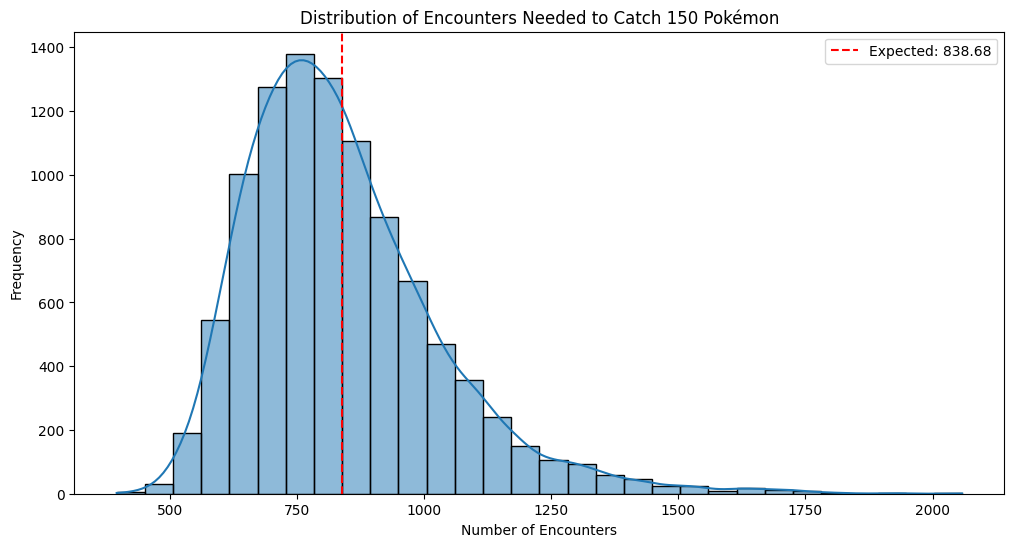

In [13]:
# Visualization
plt.figure(figsize=(12, 6))
sns.histplot(df_encounters, bins=30, kde=True)
plt.axvline(expected, color='r', linestyle='--', label=f'Expected: {expected:.2f}')
plt.title('Distribution of Encounters Needed to Catch 150 Pokémon')
plt.xlabel('Number of Encounters')
plt.ylabel('Frequency')
plt.legend()
plt.show()